# CASE STUDY
# Decision Tree: Income Prediction

In this case study, we will build a decision tree to predict the income of a given population, which is labelled as <=$50K and >$50K. The attributes (predictors) are age, working class type, marital status, gender, race etc.


In the following parts, we'll:
- clean and prepare the data, 
- build a decision tree with default hyperparameters, 
- understand all the hyperparameters that we can tune, and finally
- choose the optimal hyperparameters using grid search cross-validation.


### Understanding and Cleaning the Data

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('adult_dataset.csv')

In [4]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Let's understand the data, how it look like.
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


You can observe that the columns workclass and occupation consist of missing values which are represented as '?' in the  dataframe.

On looking a bit more closely, you will also find that whenever workclass is having a missing value, occupation is also missing in that row. Let's check how may rows are missing.

In [6]:
# rows with missing values represented as'?'.
df_1 = df[df.workclass == '?']
df_1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


Now we can check the number of rows in df_1.

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education.num   1836 non-null   int64 
 5   marital.status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital.gain    1836 non-null   int64 
 11  capital.loss    1836 non-null   int64 
 12  hours.per.week  1836 non-null   int64 
 13  native.country  1836 non-null   object
 14  income          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


There are 1836 rows with missing values, which is about 5% of the total data. We choose to simply drop these rows.

In [8]:
# dropping the rows having missing values in workclass
df = df[df['workclass'] != '?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


Let's see whether any other columns contain a "?". Since "?" is a string, we can apply this check only on the categorical columns.

In [9]:
# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])

# checking whether any other columns contain a "?"
df_categorical.apply(lambda x: x=="?", axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

Thus, the columns occupation and native.country contain some "?"s. Let's get rid of them.

In [10]:
# dropping the "?"s
df = df[df['occupation'] != '?']
df = df[df['native.country'] != '?']

Now we have a clean dataframe which is ready for model building.<br>

In [11]:
# clean dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Preparation

There are a number of preprocessing steps we need to do before building the model. 

Firstly, note that we have both categorical and numeric features as predictors. In previous models such as linear and logistic regression, we had created **dummy variables** for categorical variables, since those models (being mathematical equations) can  process only numeric variables.

All that is not required in decision trees, since they can process categorical variables easily. However, we still need to **encode the categorical variables** into a standard format so that sklearn can understand them and build the tree. We'll do that using the ```LabelEncoder()``` class, which comes with ```sklearn.preprocessing```. 

You can read the documentation of ```LabelEncoder``` <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">here</a>.





In [12]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [13]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [14]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [15]:
# look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int32
 7   education       30162 non-null  int32
 8   marital.status  30162 non-null  int32
 9   occupation      30162 non-null  int32
 10  relationship    30162 non-null  int32
 11  race            30162 non-null  int32
 12  sex             30162 non-null  int32
 13  native.country  30162 non-null  int32
 14  income          30162 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [16]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

Now all the categorical variables are suitably encoded. Let's build the model.

### Model Building and Evaluation

Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

In [17]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [18]:
# Putting feature variable to X
X = df.drop('income',axis=1)

# Putting response variable to y
y = df['income']

In [19]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [20]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6867
           1       0.78      0.52      0.63      2182

    accuracy                           0.85      9049
   macro avg       0.82      0.74      0.77      9049
weighted avg       0.84      0.85      0.84      9049



In [22]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6553  314]
 [1038 1144]]
0.8505912255497845


[Text(0.5511363636363636, 0.9166666666666666, 'x[10] <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]'),
 Text(0.2840909090909091, 0.75, 'x[2] <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]'),
 Text(0.14772727272727273, 0.5833333333333334, 'x[3] <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]'),
 Text(0.09090909090909091, 0.4166666666666667, 'x[2] <= 8.5\ngini = 0.425\nsamples = 5860\nvalue = [4068, 1792]'),
 Text(0.045454545454545456, 0.25, 'x[0] <= 37.5\ngini = 0.193\nsamples = 926\nvalue = [826, 100]'),
 Text(0.022727272727272728, 0.08333333333333333, 'gini = 0.08\nsamples = 311\nvalue = [298, 13]'),
 Text(0.06818181818181818, 0.08333333333333333, 'gini = 0.243\nsamples = 615\nvalue = [528, 87]'),
 Text(0.13636363636363635, 0.25, 'x[4] <= 1846.0\ngini = 0.451\nsamples = 4934\nvalue = [3242, 1692]'),
 Text(0.11363636363636363, 0.08333333333333333, 'gini = 0.439\nsamples = 4729\nvalue = [3192, 1537]'),
 Text(0.1590909090909091, 0.0833333333333333

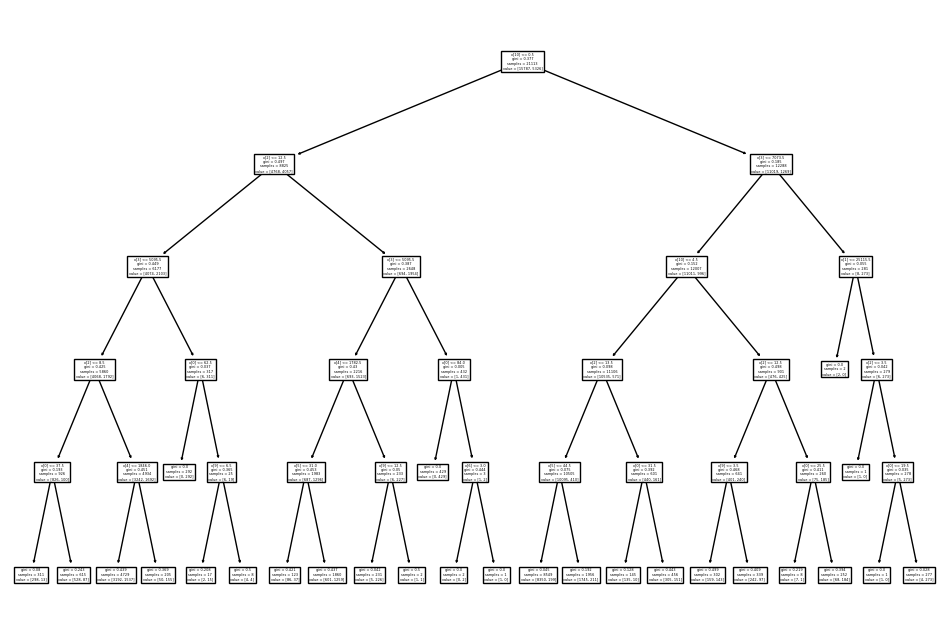

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(dt_default) 

## Grid Search to Find Optimal Hyperparameters

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [24]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 2)},
             verbose=1)

In [25]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034595,0.000883,0.002295,0.000400,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.834241,0.843713,0.840398,0.843439,0.845097,0.841378,0.003884,9
1,0.047098,0.002037,0.002194,0.000399,entropy,7,"{'criterion': 'entropy', 'max_depth': 7}",0.843950,0.851291,0.847028,0.850308,0.842255,0.846966,0.003498,4
2,0.056371,0.000928,0.002192,0.000399,entropy,9,"{'criterion': 'entropy', 'max_depth': 9}",0.842766,0.845844,0.842529,0.851966,0.844860,0.845593,0.003423,6
3,0.064367,0.000455,0.002266,0.000420,entropy,11,"{'criterion': 'entropy', 'max_depth': 11}",0.843239,0.846555,0.843713,0.854571,0.846755,0.846967,0.004063,3
4,0.073203,0.001779,0.001993,0.000002,entropy,13,"{'criterion': 'entropy', 'max_depth': 13}",0.843713,0.843476,0.841345,0.843202,0.846045,0.843556,0.001499,7
5,0.028546,0.000465,0.001992,0.000002,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.834241,0.844897,0.847265,0.842492,0.847466,0.843272,0.004865,8
6,0.038544,0.000479,0.001584,0.000480,gini,7,"{'criterion': 'gini', 'max_depth': 7}",0.846318,0.849159,0.848923,0.848176,0.844623,0.847440,0.001726,2
7,0.048561,0.000410,0.002015,0.000047,gini,9,"{'criterion': 'gini', 'max_depth': 9}",0.842292,0.849870,0.847265,0.852203,0.846755,0.847677,0.003326,1
8,0.058414,0.000997,0.001794,0.000399,gini,11,"{'criterion': 'gini', 'max_depth': 11}",0.842766,0.849396,0.843950,0.851018,0.846992,0.846824,0.003129,5
9,0.068171,0.001525,0.001806,0.000405,gini,13,"{'criterion': 'gini', 'max_depth': 13}",0.836846,0.840161,0.838503,0.840597,0.839413,0.839104,0.001334,10


In [26]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.847676957510769
DecisionTreeClassifier(max_depth=9)


In [27]:
# Find the highest accuracy value
cv_results['mean_test_score'].max()

# The depth of the tree is 9 for this accuracy

0.847676957510769

**Running the model with best parameters obtained from grid search.**

In [28]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=9)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=100)

In [29]:
# accuracy score
clf_gini.score(X_test,y_test)

0.8529119239694994

[Text(0.5800452441077442, 0.95, 'x[10] <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]'),
 Text(0.3071338383838384, 0.85, 'x[2] <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]'),
 Text(0.1968644781144781, 0.75, 'x[3] <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]'),
 Text(0.1311026936026936, 0.65, 'x[2] <= 8.5\ngini = 0.425\nsamples = 5860\nvalue = [4068, 1792]'),
 Text(0.06439393939393939, 0.55, 'x[0] <= 37.5\ngini = 0.193\nsamples = 926\nvalue = [826, 100]'),
 Text(0.0361952861952862, 0.45, 'x[6] <= 2.5\ngini = 0.08\nsamples = 311\nvalue = [298, 13]'),
 Text(0.025252525252525252, 0.35, 'x[2] <= 6.5\ngini = 0.057\nsamples = 274\nvalue = [266, 8]'),
 Text(0.013468013468013467, 0.25, 'x[11] <= 2.5\ngini = 0.023\nsamples = 175\nvalue = [173, 2]'),
 Text(0.006734006734006734, 0.15, 'x[0] <= 29.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.003367003367003367, 0.05, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.010101010101010102, 0.05

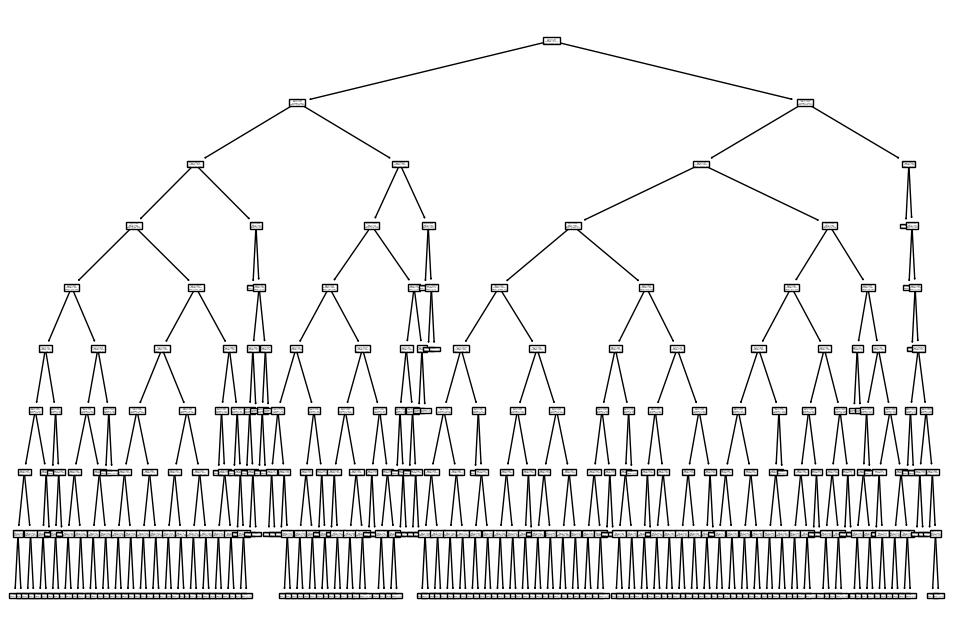

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini) 

You can see that this tree is too complex to understand. Let's try reducing the max_depth and see how the tree looks.

In [31]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3)
clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

0.8392087523483258


[Text(0.5, 0.875, 'x[10] <= 0.5\ngini = 0.377\nsamples = 21113\nvalue = [15787, 5326]'),
 Text(0.25, 0.625, 'x[2] <= 12.5\ngini = 0.497\nsamples = 8825\nvalue = [4768, 4057]'),
 Text(0.125, 0.375, 'x[3] <= 5095.5\ngini = 0.449\nsamples = 6177\nvalue = [4074, 2103]'),
 Text(0.0625, 0.125, 'gini = 0.425\nsamples = 5860\nvalue = [4068, 1792]'),
 Text(0.1875, 0.125, 'gini = 0.037\nsamples = 317\nvalue = [6, 311]'),
 Text(0.375, 0.375, 'x[3] <= 5095.5\ngini = 0.387\nsamples = 2648\nvalue = [694, 1954]'),
 Text(0.3125, 0.125, 'gini = 0.43\nsamples = 2216\nvalue = [693, 1523]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 432\nvalue = [1, 431]'),
 Text(0.75, 0.625, 'x[3] <= 7073.5\ngini = 0.185\nsamples = 12288\nvalue = [11019, 1269]'),
 Text(0.625, 0.375, 'x[10] <= 4.5\ngini = 0.152\nsamples = 12007\nvalue = [11011, 996]'),
 Text(0.5625, 0.125, 'gini = 0.098\nsamples = 11106\nvalue = [10535, 571]'),
 Text(0.6875, 0.125, 'gini = 0.498\nsamples = 901\nvalue = [476, 425]'),
 Text(0.875, 0.375

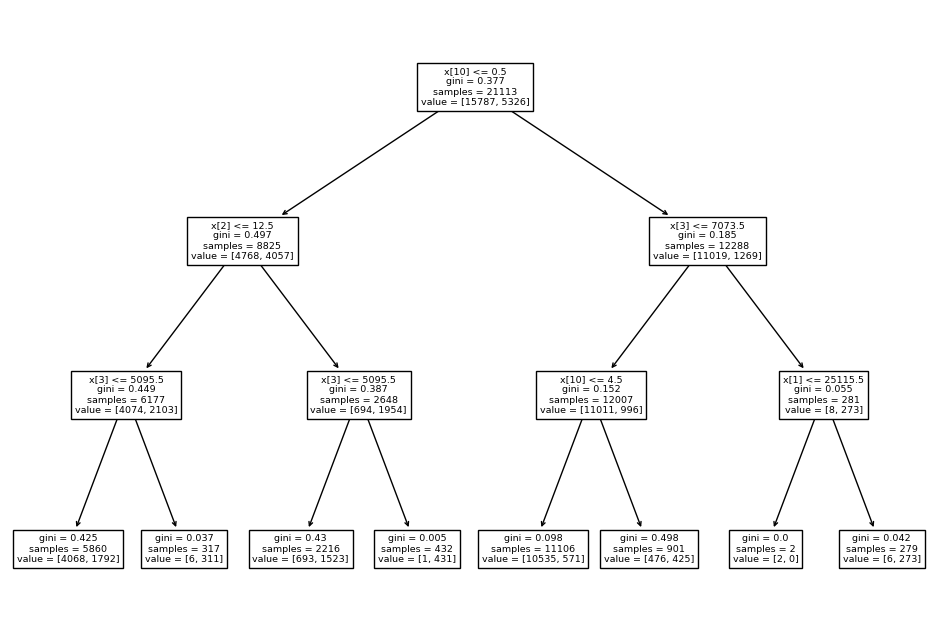

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

# Set the size of the figure
plt.figure(figsize = (12, 8))

# Display the tree by calling a method plot_tree()
tree.plot_tree(clf_gini) 

In [33]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      6867
           1       0.77      0.47      0.59      2182

    accuracy                           0.84      9049
   macro avg       0.81      0.71      0.74      9049
weighted avg       0.83      0.84      0.82      9049



In [34]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6564  303]
 [1152 1030]]


## Reference
* <big>Machine Learning with Real World Projects, Geekshub Pvt. Ltd., Packt publishing, 2019.</big>